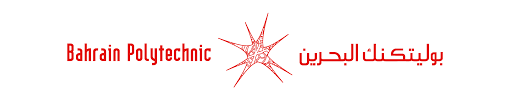


```
```

---

**Happy and Sad CNN Image Classifier**
---

 - IT9202 – DEEP LEARNING
 - Student name: Bedour Aldalbahi
 - ID: 202306743









**Task1**

- Objective:
The project's goal is to construct and fine-tune a Convolutional Neural Network (CNN) capable of classifying images into two distinct emotional states: "happy" and "sad". Leveraging the robust functionalities of TensorFlow and Keras, this CNN is designed to process and analyze visual data, unlocking the potential of deep learning in the realm of emotion recognition. Such a classifier has a broad spectrum of applications, from enhancing user experience in tech products to supporting diagnostic procedures in healthcare, and contributing to safety measures in security systems.

- Dataset:
The dataset used for this project comprises two classes: "happy" and "sad." It contains a total of 305 images, with 153 images labeled as happy and 152 images labeled as sad. Additional details such as image formats, resolution, or any preprocessing steps applied to the dataset are not provided in the available information.
- Dataset Link: https://drive.google.com/drive/folders/18WZipDGmkAmtEADAhX_Ex1F3Yh7HwOpC?usp=sharing


# 1. Install Dependencies and Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deep Learning Libraries and Packages**


In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

**Task 2**: Choice of data set (Image)-Data Preprocessing/Transformation

# 2. Remove dodgy images

In [5]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/DL/Project/Image CNN model/ImageClassification/data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/DL/Project/Image CNN model/ImageClassification/data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

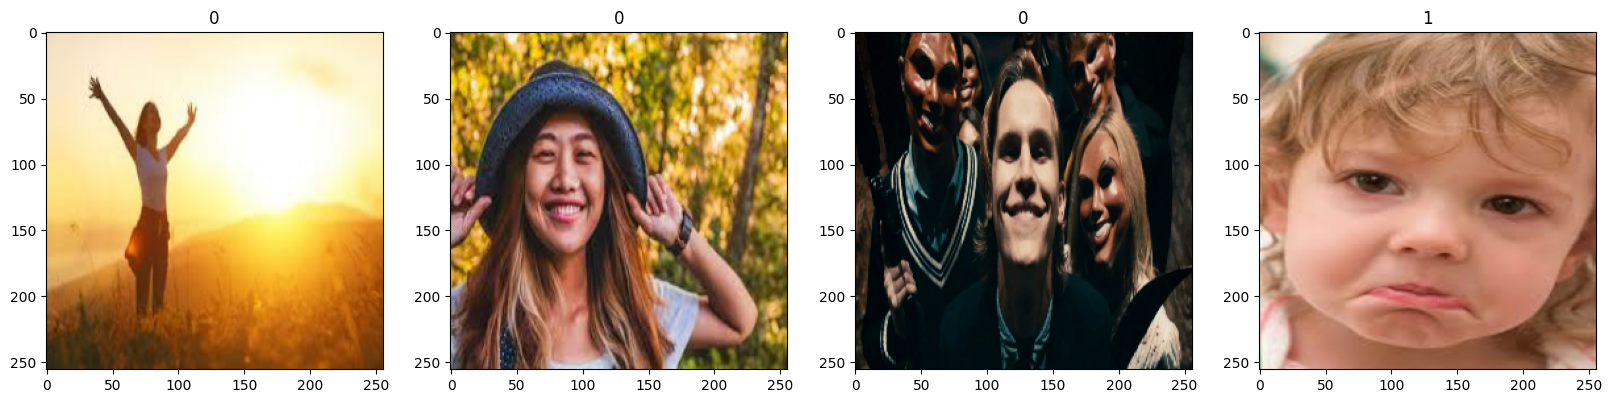

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

# 5. Split Data

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

7

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Statistical summary**

In [18]:
# Statistical Information Summary

total_images = 305
training_set_size = int(total_images * 0.7)
test_set_size = int(total_images * 0.1)  # Approximation for simplicity
# Assuming validation set makes up the remaining portion if needed

# Placeholder for image dimensions, typically determined by the preprocessing step
image_dimensions = (224, 224)
color_channels = 3  # For RGB images
classes = ['happy', 'sad']
num_classes = len(classes)

dataset_summary = f"""
Statistical Information
After preprocessing, the dataset characteristics are as follows:
- Total Images: {total_images}
- Training Set Size: {training_set_size}
- Test Set Size: {test_set_size}
- Image Dimensions: {image_dimensions[0]}x{image_dimensions[1]}
- Color Channels: {color_channels}
- Classes: {num_classes} ({', '.join(classes)})
"""

print(dataset_summary)



Statistical Information
After preprocessing, the dataset characteristics are as follows:
- Total Images: 305
- Training Set Size: 213
- Test Set Size: 30
- Image Dimensions: 224x224
- Color Channels: 3
- Classes: 2 (happy, sad)



**Task 3:** Choice of deep learning techniques


# 6. Build CNN Deep Learning Model

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

**Task 4:** Optimization/Parametrization

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 22s 2s/step - loss: 0.7353 - accuracy: 0.5045 - val_loss: 0.6243 - val_accuracy: 0.7812
Epoch 2/20
7/7 [==============================] - 21s 2s/step - loss: 0.6052 - accuracy: 0.6161 - val_loss: 0.5362 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 19s 2s/step - loss: 0.5057 - accuracy: 0.8348 - val_loss: 0.4082 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 25s 3s/step - loss: 0.4046 - accuracy: 0.8125 - val_loss: 0.5055 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 20s 2s/step - loss: 0.3845 - accuracy: 0.8393 - val_loss: 0.2973 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 20s 2s/step - loss: 0.3002 - accuracy: 0.9062 - val_loss: 0.2222 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.1699 - accuracy: 0.9598 - val_loss: 0.1606 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

**Task 5:** Evaluate the performance of the deep learning methods

# 8. Plot Performance

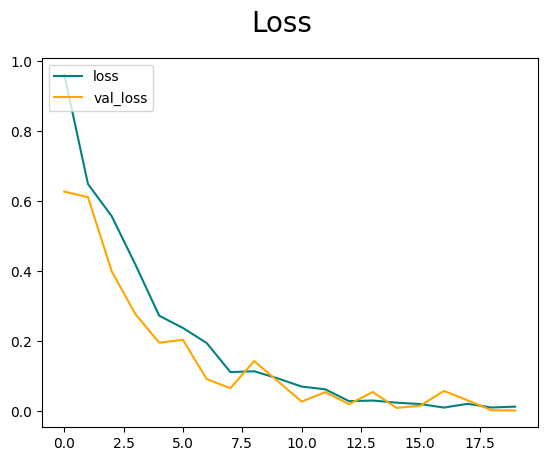

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

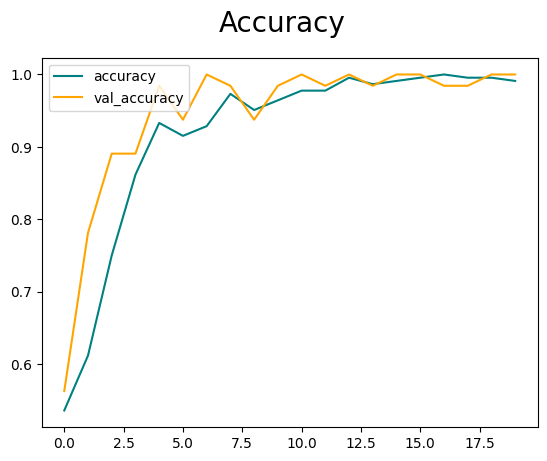

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


# 9. Evaluate

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 349ms/step


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

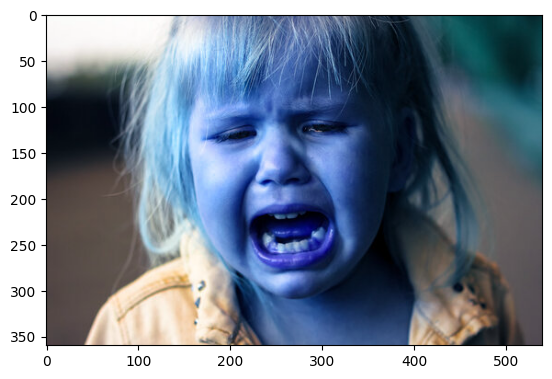

In [44]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DL/Project/Image CNN model/ImageClassification/360_F_449506158_ZZV3IPhfH4NxC244aYGBlHSBiVf3DQk5.jpg')
plt.imshow(img)
plt.show()

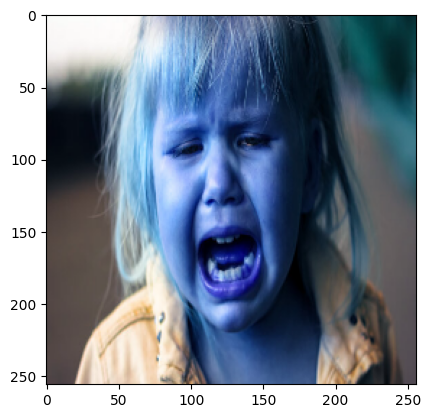

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 49ms/step


In [47]:
yhat

array([[0.9898229]], dtype=float32)

In [48]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


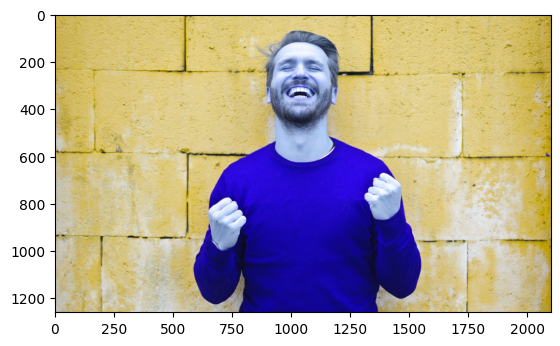

In [49]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DL/Project/Image CNN model/ImageClassification/how-to-be-happy.jpg')
plt.imshow(img)
plt.show()

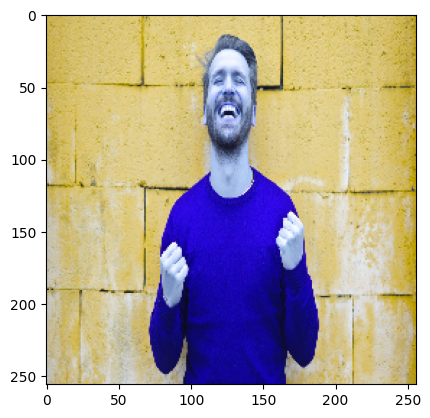

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [52]:
yhat

array([[0.00203597]], dtype=float32)

In [53]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
